In [139]:
import sys
sys.path.append(r"C:\Users\anild\PIDChallenge")

from my_utils import Plant

In [5]:
!pip install numpy
!pip install matplotlib
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


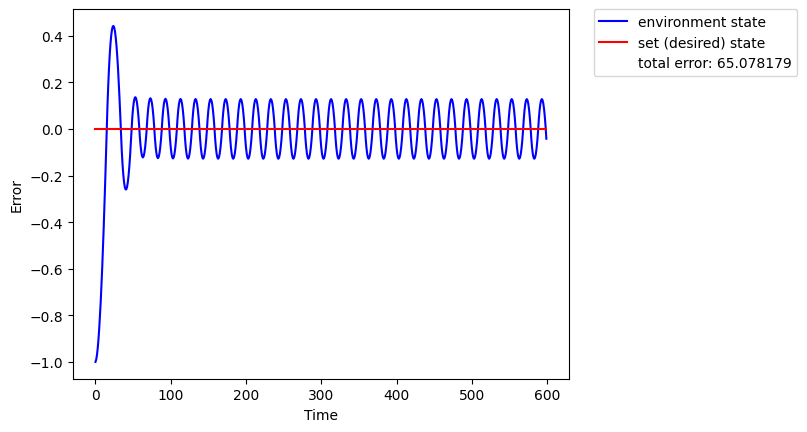

In [6]:
class BangBang(object): #here's our bang-bang controller
    def update(self, error, delta_t):
        
        response = 0
        if error > 0:
            response = 1 # heat()
        elif error < 0:
            response = -1 # dont() too lazy to make a better simulator, so we'll use -1 instead of 0
            
        return response

plant = Plant(BangBang(), set_steady=True)
plant.simulate()
# pretty pictures

In [7]:
'''
don't change any code in this cell yet
'''
class PController(object):
    def __init__(self, Kp=0.5): # init function. the default Kp value here is 0.5
        self.Kp = Kp

    def update(self, error, delta_t):
        return error*self.Kp

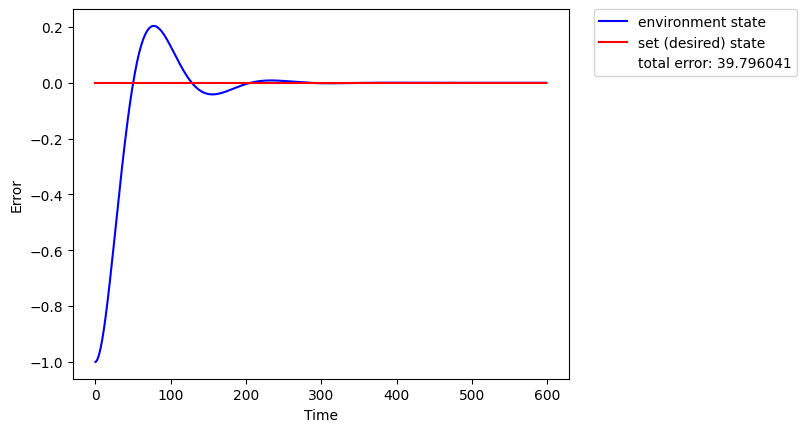

In [12]:
kp = 0.2 # CHALLENGE 1: tune Kp here
#COMPLETED CHALLENGE
controller = PController(kp) # declare and init a PController object. 

plant = Plant(controller, set_steady=True) # declare and init Plant (simulator)
plant.simulate()

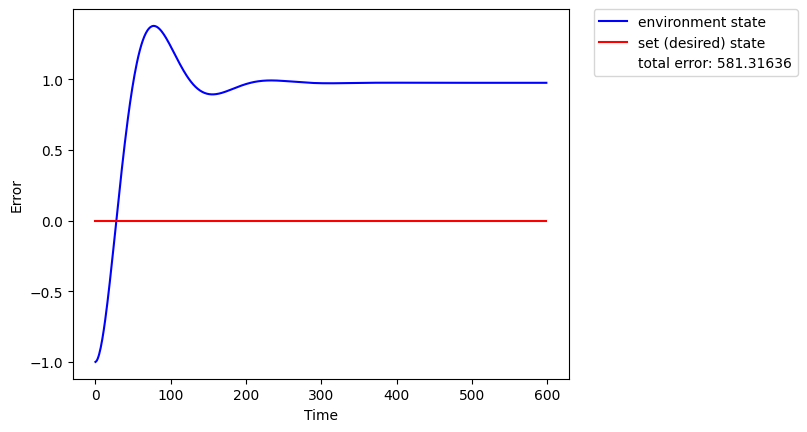

In [14]:
kp = 0.2 # tune Kp here
controller = PController(kp) # declare and init a PController object. 

plant = Plant(controller, set_steady=True, set_shift=True) # declare and init Plant (simulator)
plant.simulate()

In [132]:
class PIDController(object):
    prev_error = 0.0
    accumulated_error = 0.0
    def __init__(self, Kp=0.0, Ki=0.0, Kd=0.0):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        
    def update(self, error, delta_t):
        p = self.Kp * error
        
        '''
        CHALLENGE 2: YOUR CODE HERE
        '''
        self.accumulated_error = self.accumulated_error+(error*delta_t)
        i = self.Ki*self.accumulated_error
        derr =  ((error-self.prev_error)/delta_t);
        d = self.Kd*derr
        self.prev_error = error
        
        response = p + i + d
        return response

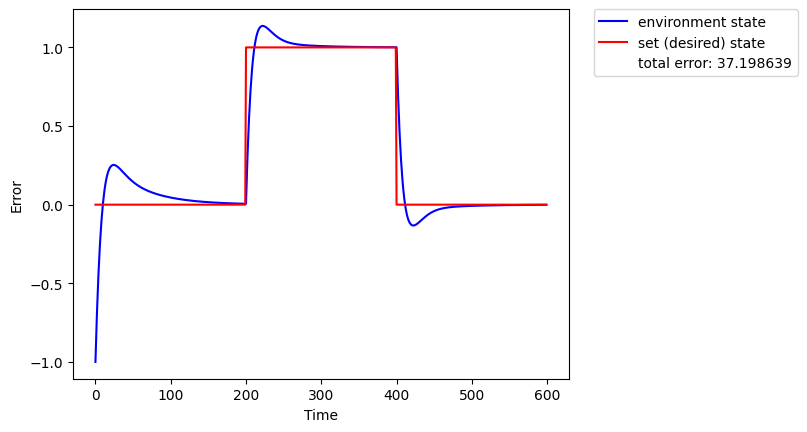

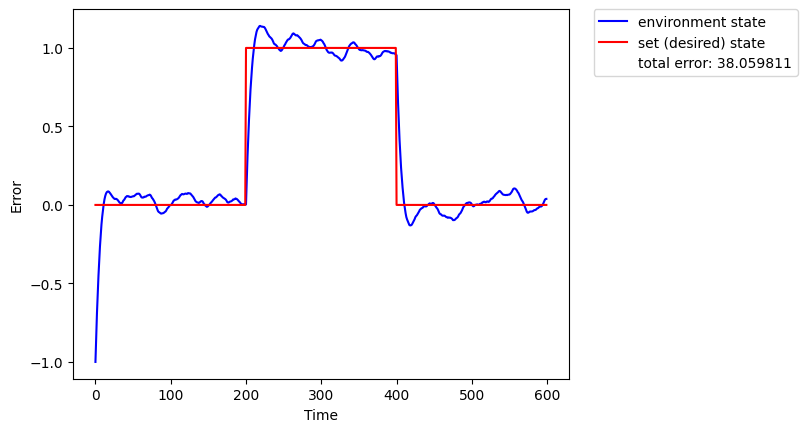

In [138]:
Kp = 1.3 #tune me!
Ki = 0.2 #tune me!
Kd = 1.5 #tune me!
controller = PIDController(Kp, Ki, Kd)

plant = Plant(controller, set_shift=True)
plant.simulate()

plant = Plant(controller, set_shift=True, noise=True)
plant.simulate()